# Regression

In regression we determine the statistical relationship of the dependent variable with the independent variable(s). It is used for prediction and forecasting. In this notebook, the automobile dataset is used which has the price and various other features of the automobiles. Here, we plan to find how price varies depending on the features of the vehicles using regression techniques. Hence price is the dependent variable. The features worth considering as dependent variable for the analysis will be decided using the exploratory data analysis.

The content of this notebook is as given below,


[Exploratory Data Analysis](#exploratory-data-analysis)

[Simple Linear Regression](#Simple-Linear-Regression)

[Multiple Linear Regression](#-Multiple-Linear-Regression)

[Polynomial Regression](#polynomial-regression)

## Exploratory Data Analysis

In [848]:
# To suppress warnings
import warnings

warnings.filterwarnings('ignore')

In [849]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [850]:
#import the data to a dataframe
df = pd.read_csv("automobileEDA.csv")

In [851]:
df 

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [852]:
df.ndim  # its a 2D data

2

In [853]:
df.shape    # has 201 rows and 29 columns.

(201, 29)

In [854]:
# checking the datatypes
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

**Handling Missing Values**

In [856]:
# checking for null values in the columns

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [857]:
# There is one null value in horsepower-binned column and 4 null values in stroke column

In [858]:
# lets see the entry with null value in the 'horsepower-binned' column
df[df['horsepower-binned'].isnull()]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,...,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,0,1


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

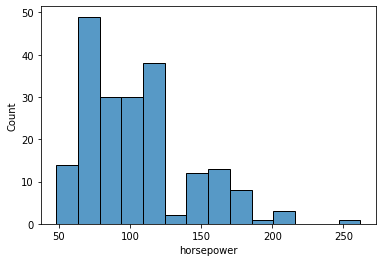

In [859]:
# histogram of the 'horsepower' column
sns.histplot(df['horsepower'])

In [860]:
# For the entry for which horsepower binned is null, the horsepower value is 262.0, which is an exteme value.
# This is clear from the histogram also.
# lets replace the null value with 'High', so that this falls in the 'High' bin

In [861]:
df.fillna({'horsepower-binned': 'High'}, inplace=True)

In [862]:
# see that no null value in the horsepower-binned column now
df[df['horsepower-binned'].isnull()]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas


<AxesSubplot:xlabel='stroke', ylabel='Count'>

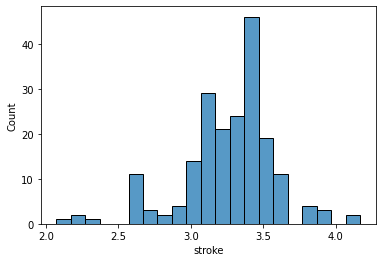

In [863]:
# The next column with null values is stroke
# Lets plot the hostogram for the 'stroke' parameter column
sns.histplot(df['stroke'])

In [864]:
# The above histogram seems to have extreme values, not necessarily outliers.

<AxesSubplot:xlabel='stroke'>

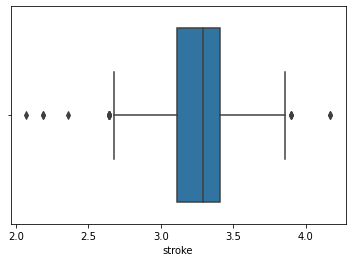

In [865]:
# Lets plot the boxplot
sns.boxplot(df['stroke'])

In [866]:
# The points outside the whiskers which is (1.5IQR), are considered outliers

In [867]:
# Lets get the statistics of the stroke column
print('Mean stroke is ', df['stroke'].mean())
print("The standard deviation is ", df['stroke'].std())
print("Median stroke is ", df['stroke'].median())
print("Mode stroke is ", df['stroke'].mode())
print("Minimum stroke is ", df['stroke'].min())
print("maximum stroke is ", df['stroke'].max())

Mean stroke is  3.256903553299492
The standard deviation is  0.3192562399907384
Median stroke is  3.29
Mode stroke is  0    3.4
dtype: float64
Minimum stroke is  2.07
maximum stroke is  4.17


In [868]:
# Lets replace the null values in the stroke column by the mean value
df['stroke']  = df['stroke'].fillna(df['stroke'].mean())

In [869]:
# Lets check the dataframe again for null values
df.isnull().sum()  

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [870]:
# From the above we can see that there is no null values in the dataframe now.

In [871]:
# Lets get the statistics of the columns. By default it displays only numeric columns.
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [872]:
# Lets display all (both numeric and categorical) columns
df.describe(include="all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [873]:
# Lets see the categorical variable column only
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [874]:
# Lets make a new dataframe with only numeric columns
df_numeric = df._get_numeric_data()
df_numeric.sample(10)  # This randomly sample 10 rows from the dataframe

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
148,1,74,95.7,0.762614,0.883333,54.5,2015,92,3.05,3.03,9.0,62.0,4800.0,31,38,6488.0,7.580645,0,1
171,-1,65,102.4,0.843825,0.923611,53.9,2414,122,3.31,3.54,8.7,92.0,4200.0,27,32,9988.0,8.703704,0,1
149,0,77,95.7,0.815473,0.883333,59.1,2280,92,3.05,3.03,9.0,62.0,4800.0,31,37,6918.0,7.580645,0,1
119,1,154,93.7,0.803940,0.886111,50.8,2191,98,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0,7.580645,0,1
30,2,137,86.6,0.694858,0.887500,50.8,1819,92,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0,7.580645,0,1
132,3,150,99.1,0.896684,0.923611,56.1,2808,121,3.54,3.07,9.0,160.0,5500.0,19,26,18150.0,12.368421,0,1
120,-1,74,103.3,0.839020,0.897222,59.8,2535,122,3.35,3.46,8.5,88.0,5000.0,24,30,8921.0,9.791667,0,1
50,1,113,93.1,0.801538,0.891667,54.1,1945,91,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0,7.580645,0,1
16,0,122,110.0,0.946660,0.984722,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,15.666667,0,1
42,0,122,94.3,0.820279,0.858333,53.5,2337,111,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0,9.791667,0,1


In [875]:
df_numeric.shape # There are 19 numerical variables in the dataframe

(201, 19)

In [876]:
# Lets make a new dataframe with all the categorical variable columns and the price column.
df_categorical = df.select_dtypes(include=['object'])
df_categorical['price'] = df['price']
df_categorical

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,price
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,13495.0
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,16500.0
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,16500.0
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium,13950.0
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium,16845.0
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High,19045.0
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium,21485.0
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium,22470.0


In [877]:
df_categorical.shape  # There are 10 categorical variables excluding the 'price' column

(201, 11)

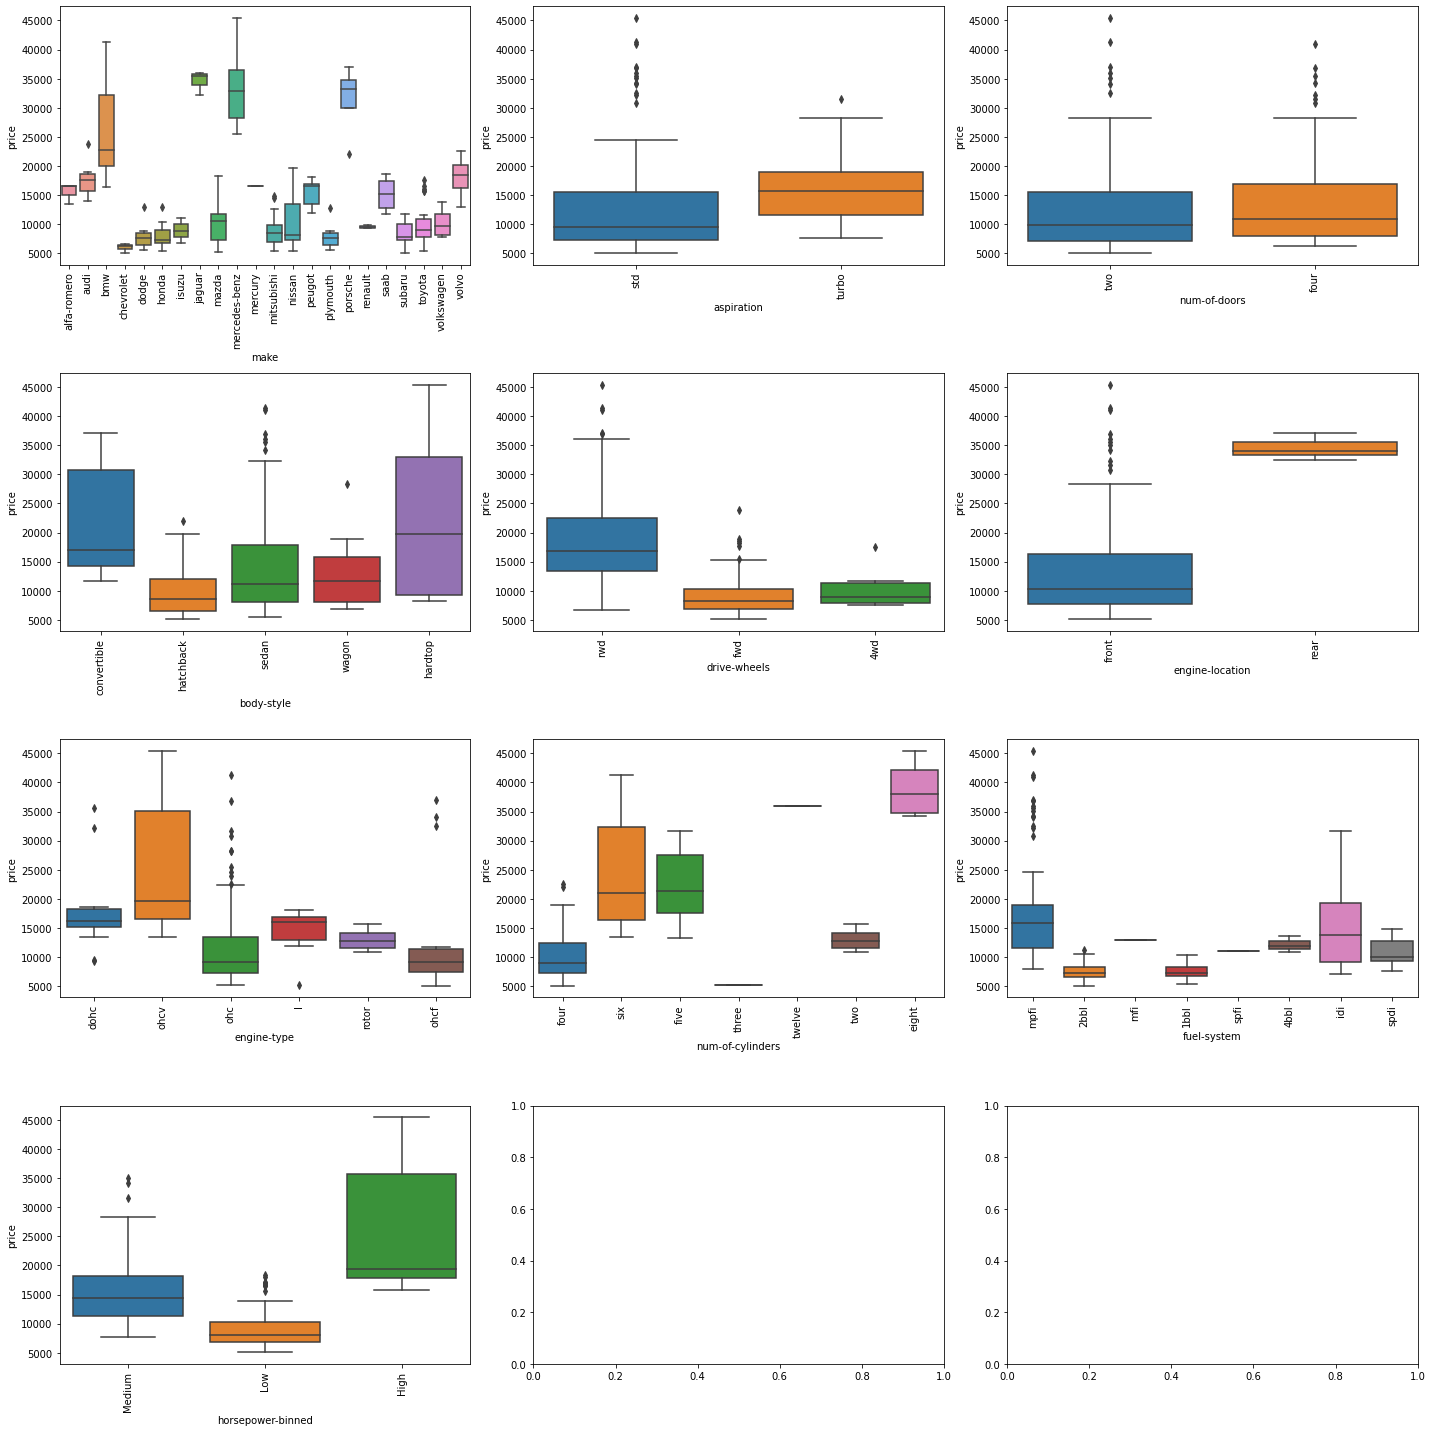

In [878]:
# lets do the boxplot for the price distribution for all the categorical variables. There are 10 columns excluding the price column

fig, ax = plt.subplots(4,3, figsize=(20,20))
ax = ax.flatten()

for j in range(10):
    g = sns.boxplot(df_categorical.iloc[:,j], df_categorical['price'], ax=ax[j])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

In [879]:
# For engine-location and drive-wheels the mean price values seem to be different, not very overlapping.
# Lets examine those two columns in detail

**T-Test**

In [880]:
# lets do T-test for engine location to see if their mean price difference is statistically significant or not. 
# It has only two categories - front and rear

In [881]:
engine_location_groups = df_categorical.groupby('engine-location').groups 
engine_location_groups

{'front': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'rear': [123, 124, 125]}

In [882]:
engine_location_groups.keys()

dict_keys(['front', 'rear'])

In [883]:
# Lets split the engine location into two groups
engine_loc_front = df_categorical['price'].iloc[engine_location_groups['front']]
engine_loc_rear = df_categorical['price'].iloc[engine_location_groups['rear']]

In [884]:
engine_loc_front

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 198, dtype: float64

In [885]:
engine_loc_rear

123    32528.0
124    34028.0
125    37028.0
Name: price, dtype: float64

In [886]:
# This T-test compares the means of two independent samples

T_stat, T_pval = stats.ttest_ind(engine_loc_front, engine_loc_rear, equal_var = False )
print(T_stat, T_pval)

-15.160962207306783 0.0010619914258569226


In [887]:
# The above p-value is < 0.05. Hence we can reject the null hypothesis. ie., here is significant difference between 
# the means of the two groups.

**ANOVA**

In [888]:
# Lets examine the drive-wheels column.
# drive-wheels has 3 groups. Lets do ANOVA test for drive-wheels

In [889]:
drive_wheels_g_obj = df_categorical.groupby('drive-wheels')
drive_wheels_g_obj.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,price
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,13495.0
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,16500.0
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,16500.0
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium,13950.0
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium,17450.0
5,audi,std,two,sedan,fwd,front,ohc,five,mpfi,Medium,15250.0
6,audi,std,four,sedan,fwd,front,ohc,five,mpfi,Medium,17710.0
7,audi,std,four,wagon,fwd,front,ohc,five,mpfi,Medium,18920.0
8,audi,turbo,four,sedan,fwd,front,ohc,five,mpfi,Medium,23875.0
9,bmw,std,two,sedan,rwd,front,ohc,four,mpfi,Low,16430.0


In [890]:
drive_wheels_g_obj.groups.keys()

dict_keys(['4wd', 'fwd', 'rwd'])

In [891]:
g_4wd = drive_wheels_g_obj.get_group('4wd')['price']
g_fwd = drive_wheels_g_obj.get_group('fwd')['price']
g_rwd = drive_wheels_g_obj.get_group('rwd')['price']


In [892]:
print(len(g_4wd))
print(len(g_fwd))
print(len(g_rwd))

8
118
75


In [893]:
# performing the ANOVA test
F_stat, F_pval = stats.f_oneway(g_4wd, g_fwd, g_rwd)
print(F_stat, F_pval)

67.95406500780399 3.3945443577151245e-23


In [894]:
# The above result shows high F statistic with very less P-value. This shows that The mean values of the 
# 3 groups are different.

# From the visualizations, it is clear that 'rwd' group is the one which is different from the others.
# Lets do post-hoc test to see which group is contributing the most to the significant mean difference.
# One post-hoc test can be perform T-test for all the pairs. 
# Other post-hoc test is Tukey's test.

In [895]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

In [896]:
tukey = pairwise_tukeyhsd(endog=df_categorical['price'],
                          groups= df_categorical['drive-wheels'],
                          alpha = 0.05)

In [897]:
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd  -996.2203 0.8974 -6302.5087   4310.068  False
   4wd    rwd  9516.6133 0.0001  4114.6082 14918.6184   True
   fwd    rwd 10512.8337   -0.0  8367.9755 12657.6919   True
------------------------------------------------------------


In [898]:
# from the above table, it is clear that there is not much difference between 4wd and fwd groups. 
# But there is significant difference between '4wd' and 'rwd' groups, also between 'rwd' and 'fwd' groups.

In [899]:
# engine-location and drive-wheels seem to be good predictor variables for the price values.

In [900]:
# Now let's analyse the numeric columns.

In [901]:
# calculate the correlation coeff for all the pairs in the df_numeric dataframe
corr_data = df_numeric.corr()
corr_data 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.098282,-0.063388,-0.034079,-0.034741,0.082267,0.036285,0.241033,-0.241033


<AxesSubplot:>

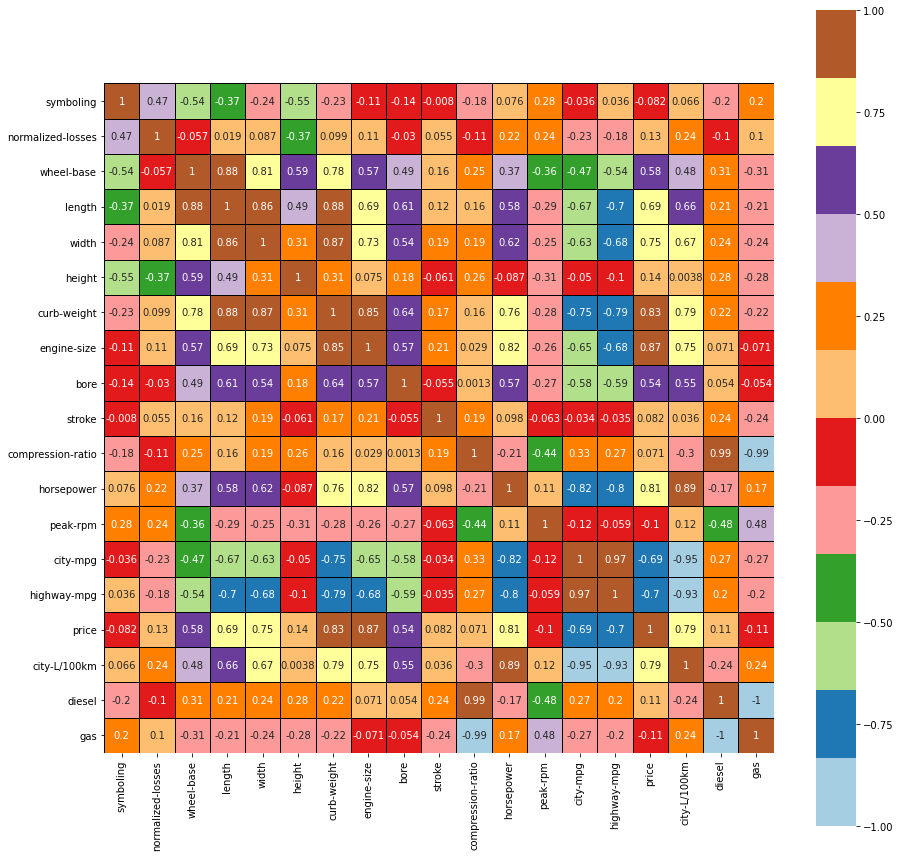

In [902]:
# Using heatmap, we can visualize the above table
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_data, cmap = 'Paired', annot = True, square = True, linewidths=1, linecolor = 'k')

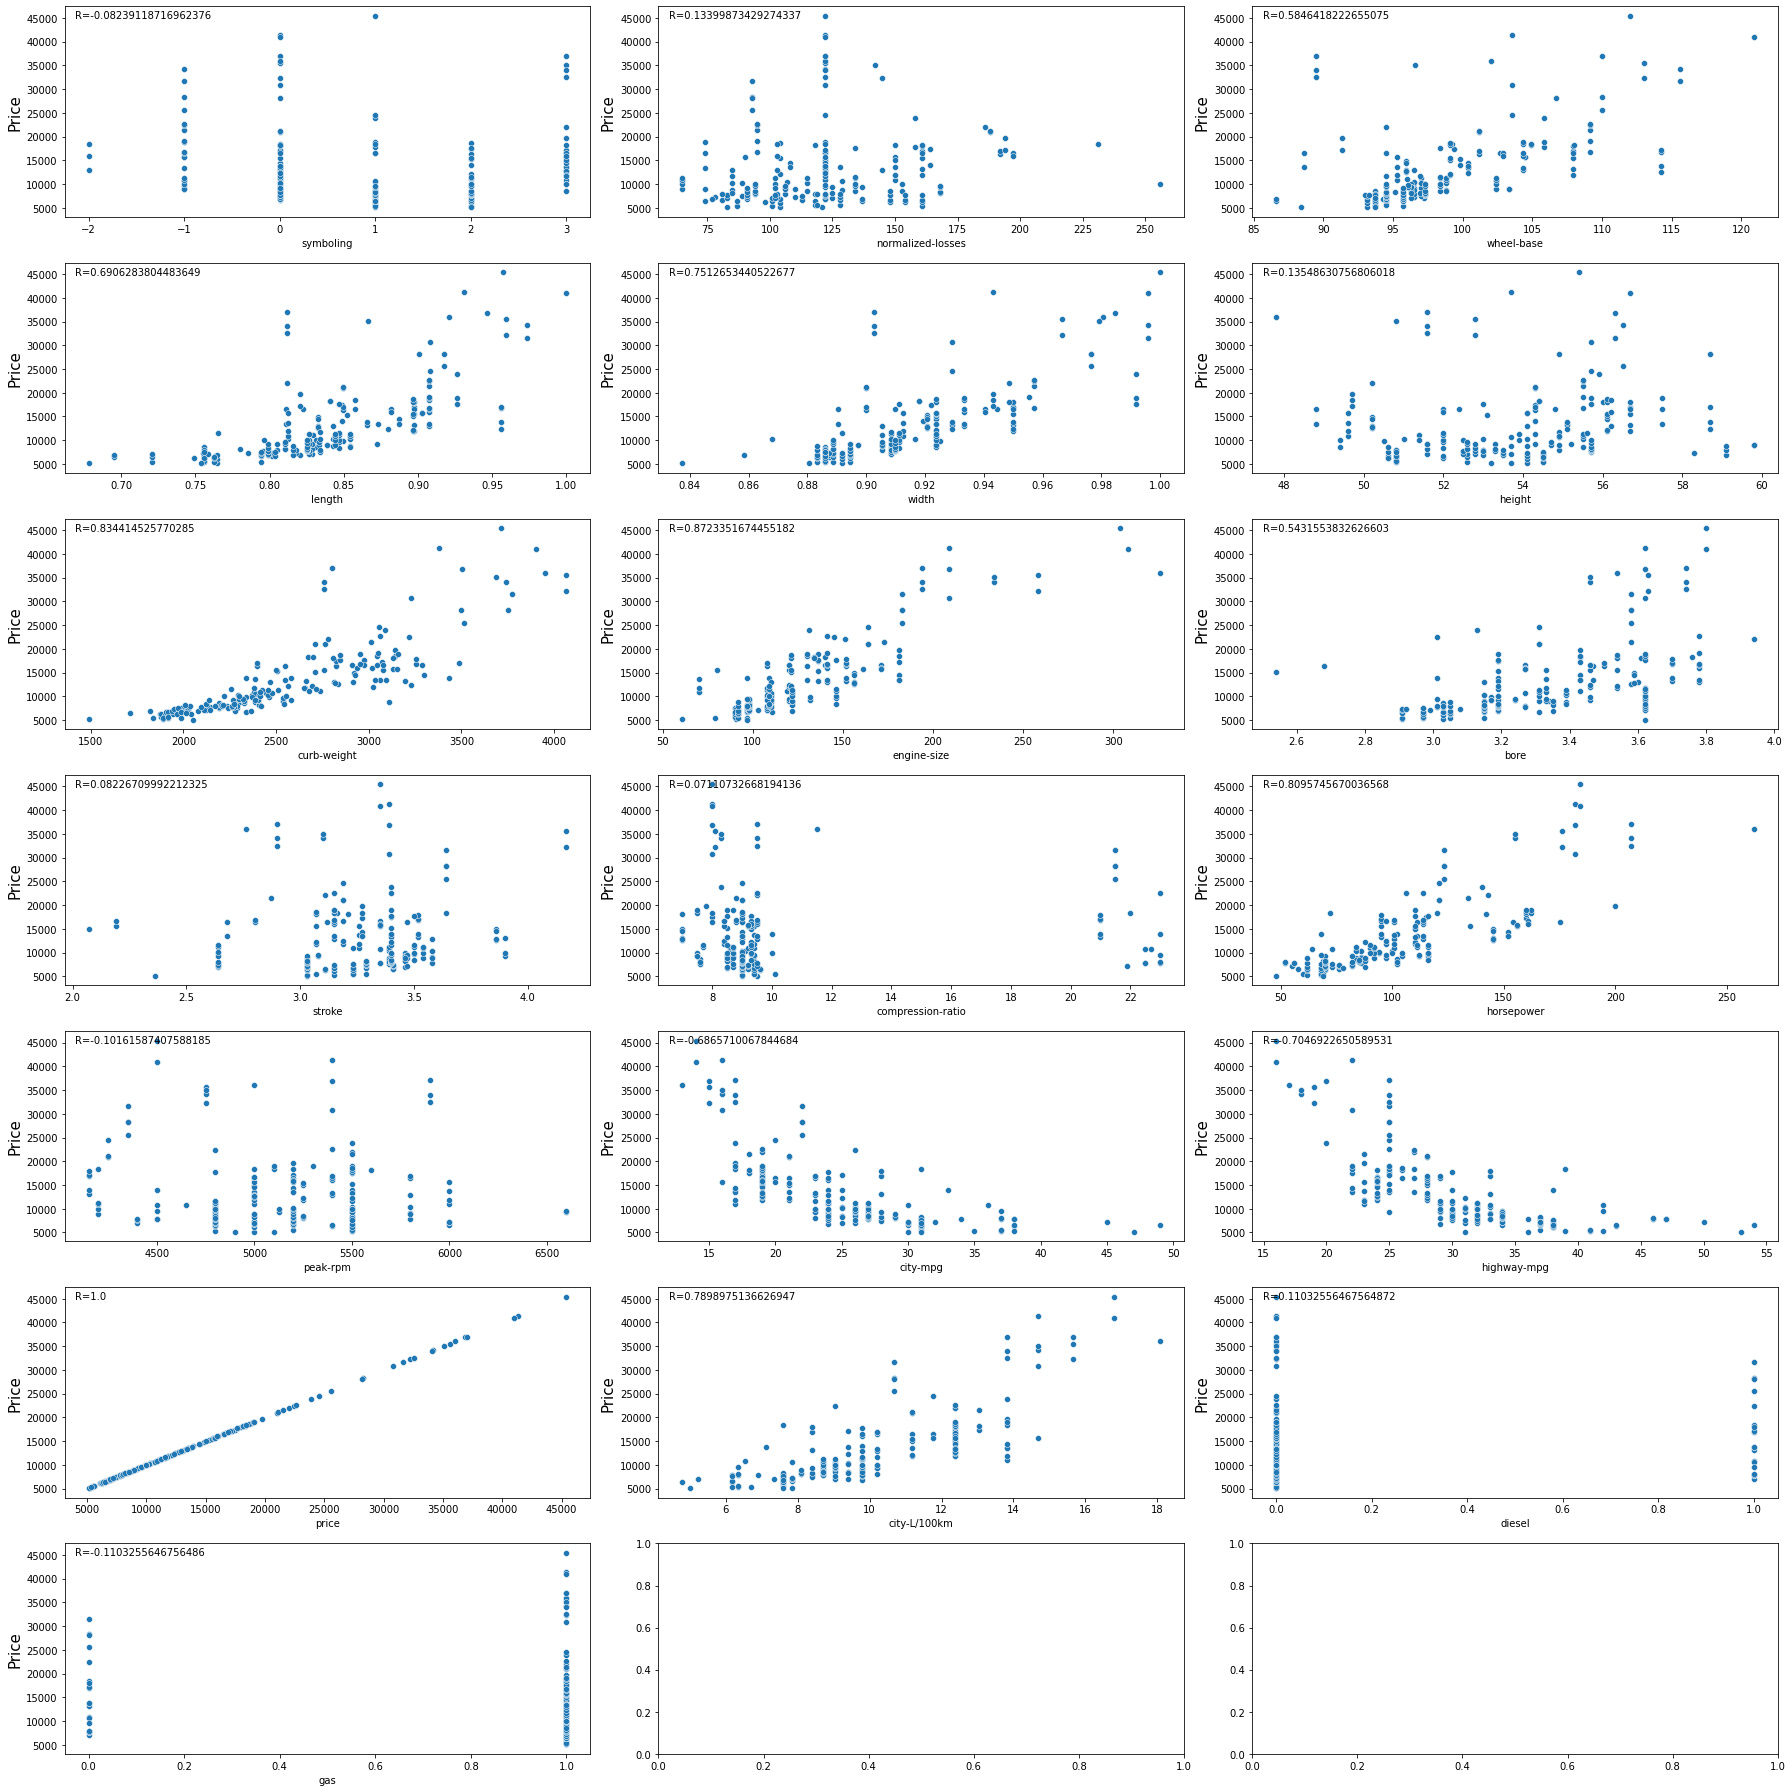

In [903]:
# Lets do the scatterplots of the variables with the price variable.
fig, ax = plt.subplots(7,3, figsize=(25,25))
ax = ax.flatten()
for i in range(19):
    #print(ax[i])
    sns.scatterplot(df_numeric.iloc[:,i], df_numeric['price'], ax=ax[i])
    ax[i].set_xlabel(df_numeric.columns[i])
    ax[i].set_ylabel('Price', fontsize=15)
    x = 'R='+str(corr_data['price'][i])
    ax[i].text(0.02, 0.98, x, ha="left", va="top", transform=ax[i].transAxes)
plt.tight_layout()

In [904]:
# The scatter plots are shown above. The correlation coefficient value for the respective pair is also written on the plot.

In [905]:
# lets take columns with correlation coeff |R| > .50 
corr_data[(corr_data['price']> 0.5)| (corr_data['price']< -0.5)].price

wheel-base      0.584642
length          0.690628
width           0.751265
curb-weight     0.834415
engine-size     0.872335
bore            0.543155
horsepower      0.809575
city-mpg       -0.686571
highway-mpg    -0.704692
price           1.000000
city-L/100km    0.789898
Name: price, dtype: float64

**Pearson's R**

In [906]:
# Lets calculate the Pearson's R value (we get the same value as .corr() method) and the P-value for all the pairs above.

In [907]:
coeff = []
p_val = []
var_list = corr_data[(corr_data['price']> 0.5)| (corr_data['price']< -0.5)].price.index.values
for i in var_list:
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    coeff.append(pearson_coef)
    p_val.append(p_value)
print(pd.DataFrame({'Feature': var_list, 'Pearson R': coeff, 'P value': p_val}))



         Feature  Pearson R       P value
0     wheel-base   0.584642  8.076488e-20
1         length   0.690628  8.016477e-30
2          width   0.751265  9.200336e-38
3    curb-weight   0.834415  2.189577e-53
4    engine-size   0.872335  9.265492e-64
5           bore   0.543155  8.049189e-17
6     horsepower   0.809575  6.369057e-48
7       city-mpg  -0.686571  2.321132e-29
8    highway-mpg  -0.704692  1.749547e-31
9          price   1.000000  0.000000e+00
10  city-L/100km   0.789898  3.903106e-44


In [908]:
# The above table gives the Pearson's R value between various variables with the price values. All of them
# are having P value < 0.001 , hence their correlation is statistically significant

In [909]:
# engine-size seems to be highly correlated with the price with R = 0.87 

In [910]:
# lets do simple linear regression using the engine-size as the independent variable

# Simple Linear Regression 

Simple Linear Regression is accomplished using a linear function as below,

$$
Yhat = a + b  X
$$

Yhat is the response variable or the dependent variable, X is the predictor variable or the independent variable.
a is the intercept and b is the slope.

In our case price is the response variable and engine-size is the predictor variable 

<AxesSubplot:xlabel='price', ylabel='Density'>

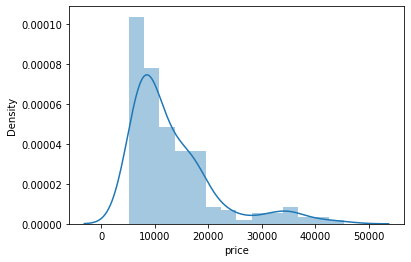

In [911]:
# lets see the distribution of price
sns.distplot(df_numeric.price)

<AxesSubplot:xlabel='engine-size', ylabel='Count'>

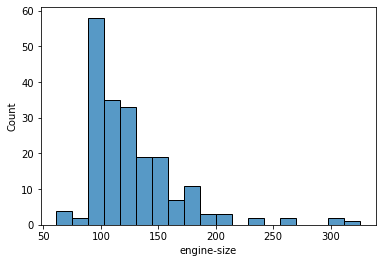

In [912]:
# visualize the engine-size column
sns.histplot(data=df_numeric, x='engine-size')

# We can see that it has long tail to the right side. Those extreme values to the right side need not be 
# necessarily outliers but legitimate values. But it may affect the model

<AxesSubplot:xlabel='engine-size'>

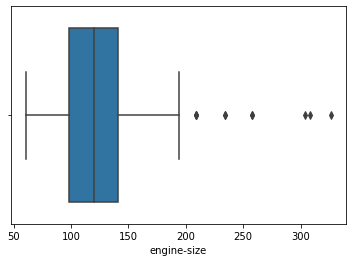

In [913]:
# the boxplot 
sns.boxplot(data=df_numeric, x='engine-size')

# you can see the extreme values to the right side of the whisker

<AxesSubplot:xlabel='engine-size', ylabel='price'>

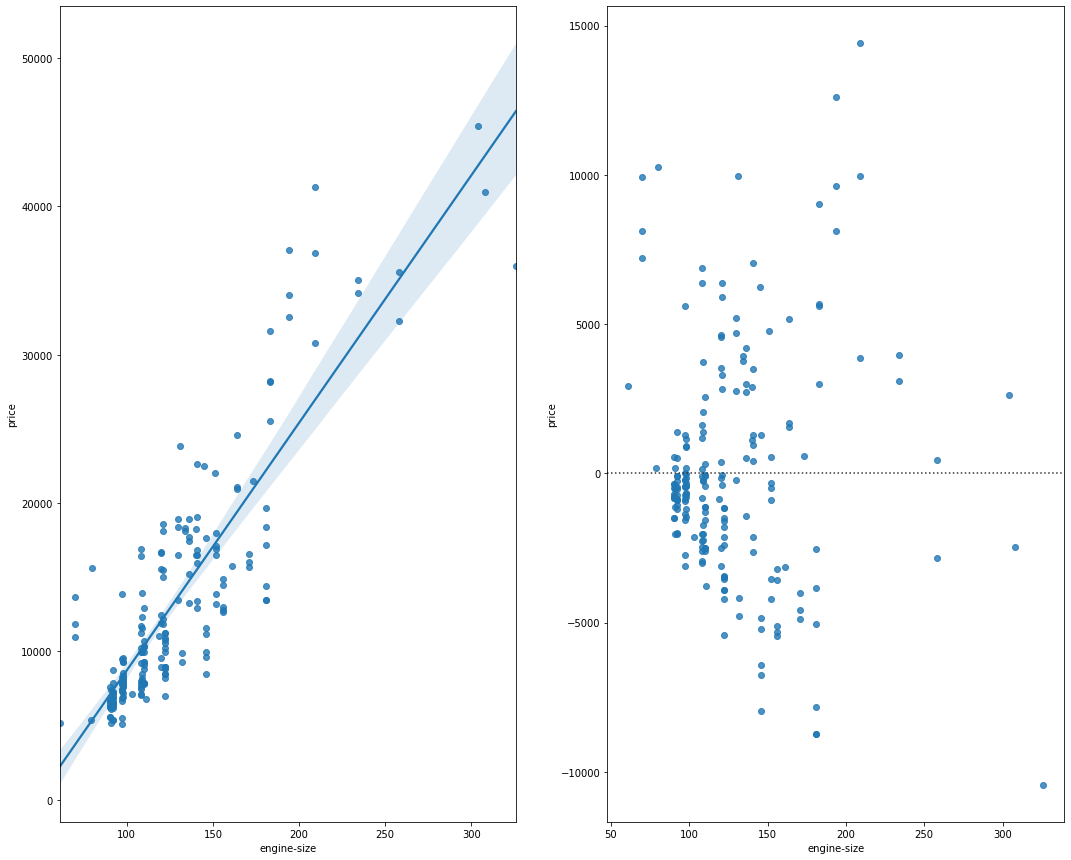

In [914]:
# Lets do regression plot and residual plot to see if linear model is appropriate
fig, ax = plt.subplots(1,2, figsize=(18,15))
ax=ax.flatten()
sns.regplot(data=df_numeric, x='engine-size', y='price', ax=ax[0])
sns.residplot(data=df_numeric, x='engine-size', y='price', ax=ax[1])

In [915]:
# lets make our input and output dataframes
X = df[['engine-size']]
Y = df.price 

In [916]:
# lets split the data into train and test in an 80:20 ratio

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20)

In [917]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(160, 1)
(160,)
(41, 1)
(41,)


In [918]:
from sklearn.linear_model import LinearRegression 
model_slr = LinearRegression()

In [919]:
model_slr.fit(Xtrain, Ytrain)

LinearRegression()

In [920]:
intercept = model_slr.intercept_
slope = model_slr.coef_
print("The slope calculated by the model is ", slope)
print("The intercept calculated by the model is ", intercept)

The slope calculated by the model is  [172.43339837]
The intercept calculated by the model is  -8438.625563980517


Hence the regression model is 

Price = 168.71492794 * engine-size - 8037.7761431131385

In [921]:
# Lets predict the prices using the model for train and test data 
ytrain_predicted = model_slr.predict(Xtrain)
ytest_predicted = model_slr.predict(Xtest)


In [922]:
# get the R-squared value for train and test data
R_squa_train = model_slr.score(Xtrain, Ytrain)
R_squa_test =  model_slr.score(Xtest, Ytest)
print("R-squared using the train data is ", R_squa_train)
print("R- quared using the test data is ", R_squa_test)

R-squared using the train data is  0.7797457298604584
R- quared using the test data is  0.5344365042567044


In [923]:
mse_train = np.mean((ytrain_predicted - Ytrain) ** 2)
print("The mean square error (MSE) using the train data is ", mse_train)
mse_test = np.mean((ytest_predicted - Ytest) ** 2)
print("The mean square error (MSE) using the test data is ", mse_test)

The mean square error (MSE) using the train data is  15767740.561352784
The mean square error (MSE) using the test data is  12632565.792426538


In [924]:
# Using the built-in function to calculate the mse
from sklearn.metrics import mean_squared_error

In [925]:
print(mean_squared_error(Ytrain, ytrain_predicted))  # just checking out the above calculation
print(mean_squared_error(Ytest, ytest_predicted))

15767740.561352784
12632565.792426538


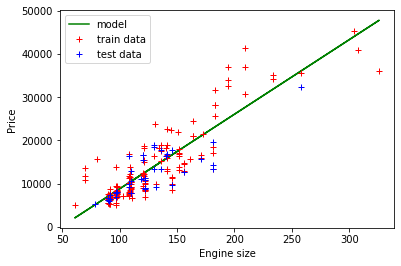

In [926]:
# Let's plot the train data, test data and the model

plt.plot(Xtrain, ytrain_predicted, "g-", Xtrain, Ytrain, 'r+', Xtest, Ytest, "b+")
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.legend(['model','train data','test data'])


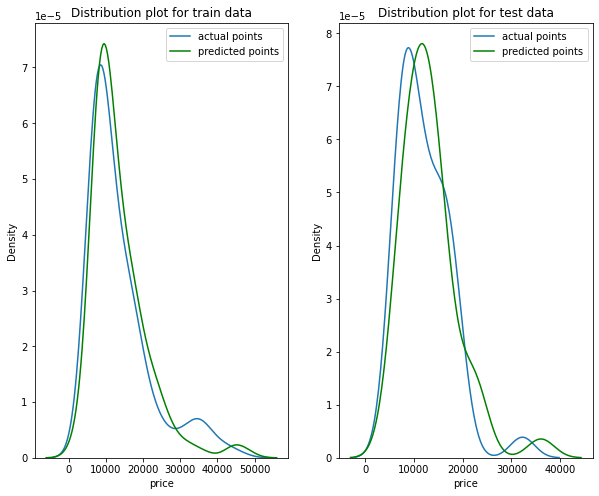

In [927]:
# Distribution plots using train and test data

fix, ax = plt.subplots(figsize=(10,8), nrows=1, ncols=2)
sns.distplot(Ytrain, ax=ax[0], hist=False, label= 'actual points')
sns.distplot(ytrain_predicted,ax=ax[0], color='g', hist=False, label='predicted points')
ax[0].set_title("Distribution plot for train data")
ax[0].legend()

sns.distplot(Ytest, ax=ax[1], hist=False, label='actual points')
sns.distplot(ytest_predicted,ax=ax[1], color='g', hist=False, label='predicted points')
ax[1].set_title("Distribution plot for test data")
ax[1].legend()


**Simple Linear Regression using statsmodels.api**

In [928]:
# Lets do the linear regression with statsmodels.api and check for the consistency of the results

In [929]:
import statsmodels.api as sm 

In [930]:
Xtrain_sm = sm.add_constant(Xtrain)
sm_slr = sm.OLS(Ytrain, Xtrain_sm).fit()  # adding a constant column for intercept calculation
print(sm_slr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     559.4
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           8.84e-54
Time:                        10:33:16   Log-Likelihood:                -1552.9
No. Observations:                 160   AIC:                             3110.
Df Residuals:                     158   BIC:                             3116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8438.6256    979.682     -8.614      

**Simple linear regression using statsmodels.formula.api**

In [931]:
# Lets do simple Linear Regression using statsmodels.formula.api

In [932]:
from statsmodels.formula.api import ols

In [933]:
XYtrain = Xtrain.copy()
XYtrain['price'] = Ytrain
XYtrain.rename(columns= {"engine-size": "engine_size"}, inplace=True)
XYtrain

,engine_size,price
105,152,13200.0
159,98,8058.0
15,209,41315.0
138,108,7775.0
109,152,16900.0
...,...,...
1,130,16500.0
120,122,8921.0
200,141,22625.0
160,98,8238.0


In [934]:
model = ols('price ~ engine_size', data= XYtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     559.4
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           8.84e-54
Time:                        10:33:17   Log-Likelihood:                -1552.9
No. Observations:                 160   AIC:                             3110.
Df Residuals:                     158   BIC:                             3116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8438.6256    979.682     -8.614      

In [935]:
# print out the slope and intercept of the model
results.params

Intercept     -8438.625564
engine_size     172.433398
dtype: float64

In [936]:
# The sum of Squares of residuals is calculated using 2 methods below.
# sum of squares of residuals, ssr = Sum of (Difference between predicted response variables and the actual response variables )
print(results.ssr, np.sum(results.resid **2))

2522838489.8164444 2522838489.8164444


In [937]:
# The residuals degrees of freedom df_resid = N-K , where N is the no. of observations and K is the number of model params.
# Here N = 160, K = 2 (slope and intercept), Hence df_resid = 160-2 = 158

results.df_resid

158.0

In [938]:
# MSE is calculated using 3 methods here.
# Note here MSE is calculated is ssr/df_resid
# dividing by df_resid, instead of sample size N gives an unbiased estimate of the true standard error. If we divide by 
# sample size, we will have biased estimate that on average gives you an estimate lower than the true value
print(results.mse_resid, (results.ssr/results.df_resid), results.scale)

15967332.21402813 15967332.21402813 15967332.21402813


In [939]:
# Residual Standard Error or Residual Standard Deviation can be calculated as square root of mse calculated above
# Calculated using 2 methods
print(np.sqrt(results.scale), (np.sqrt(results.ssr/results.df_resid)))


3995.9144402787365 3995.9144402787365


**Simple Linear Regression using scipy.stats**

In [940]:
# Lets do simple linear regression using scipy.stats 

In [941]:
import scipy.stats as st 

In [942]:
modl = st.linregress(Xtrain.squeeze(), Ytrain )
modl 

LinregressResult(slope=172.43339837044297, intercept=-8438.625563980528, rvalue=0.8830321227794943, pvalue=8.835010171871483e-54, stderr=7.29085582005686, intercept_stderr=979.6817064584188)

In [943]:
# Above we have seen various methods to perform Simple Linear Regression

**K- Fold Cross validation**

When we split the data into train and test and construct the model using train data, the model will depend on the train data set chosen. When we do the data split again, the train dataset would change and hence the model parameters also change. K-fold cross validation will split the data into K folds and performs the regression K times, each time one unique fold would be the test data and the remaining folds would be train data.

In [944]:
CV_lm_slr = LinearRegression()

In [945]:
from sklearn.model_selection import cross_val_score


In [946]:
# calculating R-squared with 5-fold cross validation
cross_val_score(CV_lm_slr, X,Y, cv=5, scoring="r2")

array([0.74523405, 0.83345533, 0.26216537, 0.7207376 , 0.2543198 ])

In [947]:
# calculating Mean Square Error with 5-fold cross validation
cross_val_score(CV_lm_slr, X,Y, cv=5, scoring="neg_mean_squared_error")

array([-18437354.97393782, -21600089.37705489, -13926499.70703179,
       -15636293.51927521, -13329261.83112647])

# Multiple Linear Regression




Multiple linear regression model is given below,

$$
Yhat = a + b1 X1 + b2 X2 + b3 X3 + b4 X4 + ...
$$

Yhat is the response variable or the dependent variable. X1, X2, X3, X4, ... are the predictor variables or the independent variables. b1, b2, b3, b4, ... are the coefficients for the variables X1, X2, X3, X4, ... respectively. a is the intercept.


Lets use the numerical variables - horsepower, engine-size, curb-weight and city-L/100km and the categorical variable drive-wheels as input features for the regression ie., a total of 5 independent variables 





In [1098]:
# dataframe with input features
input = df[['horsepower','curb-weight','engine-size','city-L/100km', 'drive-wheels']]
input 

,horsepower,curb-weight,engine-size,city-L/100km,drive-wheels
0,111.0,2548,130,11.190476,rwd
1,111.0,2548,130,11.190476,rwd
2,154.0,2823,152,12.368421,rwd
3,102.0,2337,109,9.791667,fwd
4,115.0,2824,136,13.055556,4wd
...,...,...,...,...,...
196,114.0,2952,141,10.217391,rwd
197,160.0,3049,141,12.368421,rwd
198,134.0,3012,173,13.055556,rwd
199,106.0,3217,145,9.038462,rwd


In [1099]:
# lets get dummy variables for the column 'drive-wheels'.
input = pd.get_dummies(input)
input 


,horsepower,curb-weight,engine-size,city-L/100km,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,111.0,2548,130,11.190476,0,0,1
1,111.0,2548,130,11.190476,0,0,1
2,154.0,2823,152,12.368421,0,0,1
3,102.0,2337,109,9.791667,0,1,0
4,115.0,2824,136,13.055556,1,0,0
...,...,...,...,...,...,...,...
196,114.0,2952,141,10.217391,0,0,1
197,160.0,3049,141,12.368421,0,0,1
198,134.0,3012,173,13.055556,0,0,1
199,106.0,3217,145,9.038462,0,0,1


In [720]:
# Lets count the values in each dummy column for the drive-wheels variable
lst = ['drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd']
drive_wheels_value_counts = pd.DataFrame() 
for i in lst:
    c = input[i].value_counts().to_dict()
    drive_wheels_value_counts = drive_wheels_value_counts.append(c, ignore_index=True)
drive_wheels_value_counts.index = lst
drive_wheels_value_counts


,0,1
drive-wheels_4wd,193.0,8.0
drive-wheels_fwd,83.0,118.0
drive-wheels_rwd,126.0,75.0


In [721]:
# From the above table we can see that drive-wheels_fwd has maximum number of observations (118).

# We should be dropping one dummy column to avoid dummy variable trap.
# lets drop wheels_fwd column which has maximum observations

In [722]:
input.drop("drive-wheels_fwd", axis='columns', inplace=True)

In [1106]:
output = df['price']

In [723]:
# splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size=0.20)

In [724]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 6)
(160,)
(41, 6)
(41,)


In [725]:
# constructing the linear regression model
lm_mlr = LinearRegression()
lm_mlr.fit(X_train, Y_train)

LinearRegression()

In [726]:
print("The intercept for the model is ",lm_mlr.intercept_ )

The intercept for the model is  -12950.234317597062


In [735]:
# The coefficients for various features of the model are as given below
coef_df = pd.DataFrame(lm_mlr.coef_, index = X_train.columns, columns=['Coefficients'])
coef_df.index.names= ["Features"] 
coef_df  

,Coefficients
Features,
horsepower,-2.103153
curb-weight,2.638787
engine-size,94.693980
city-L/100km,685.734322
drive-wheels_4wd,-359.500584
drive-wheels_rwd,1987.015002


The multiple regression model we have here is,



Price = -12950.234317597062 -2.103153  * horsepower + 2.638787 * (curb-weight) + 94.693980 * (engine-size) 
                 + 685.734322 * (city-L/100km) -359.500584 * (drive-wheels_fwd) + 1987.015002 * (drive-wheels_rwd)



In [736]:
# Lets find R-squared and adjusted R-squared using train data
adj_R2_train = 1 - (1-lm_mlr.score(X_train, Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print("The R-squared using the train data is ",lm_mlr.score(X_train, Y_train))
print("The adjusted R-squared using train data is ", adj_R2_train)


The R-squared using the train data is  0.8143068788257153
The adjusted R-squared using train data is  0.80702479564241


In [737]:
# R-squared and Adjusted R-squared using test data
adj_R2_test =  1 - (1-lm_mlr.score(X_test, Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("The R-squaredd using the test data is ",lm_mlr.score(X_test, Y_test))
print("The adjusted R-squared using test data is ", adj_R2_test)



The R-squaredd using the test data is  0.850120382125841
The adjusted R-squared using test data is  0.823671037795107


In [739]:
Y_test_predicted = lm_mlr.predict(X_test)
Y_train_predicted = lm_mlr.predict(X_train)
print("The mse using the train data is ",mean_squared_error(Y_train, Y_train_predicted))
print("The mse using the test data is ",mean_squared_error(Y_test, Y_test_predicted))


The mse using the train data is  11519894.079556307
The mse using the test data is  9616027.146681774


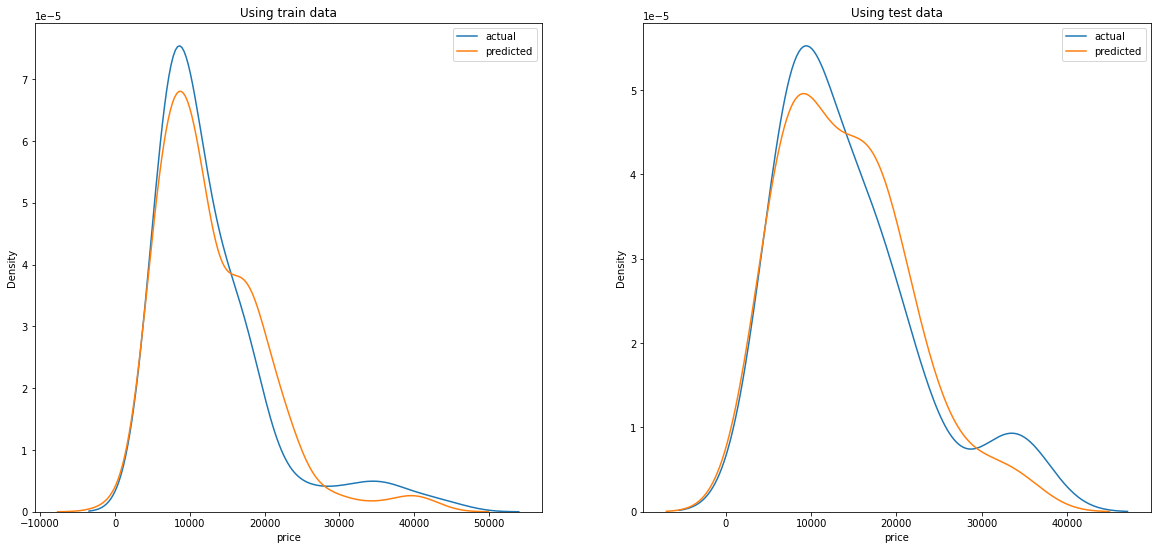

In [742]:
# Lets do the distribution plots
fig, ax = plt.subplots(1,2, figsize=(20,9))
ax = ax.flatten()
sns.distplot(Y_train, hist= False, ax= ax[0], label = "actual")
sns.distplot(Y_train_predicted, hist = False, ax= ax[0], label= 'predicted')
ax[0].set_title("Using train data")
ax[0].legend()

sns.distplot(Y_test, hist= False, ax= ax[1], label = "actual")
sns.distplot(Y_test_predicted, hist = False, ax= ax[1], label= 'predicted')
ax[1].set_title("Using test data")
ax[1].legend()

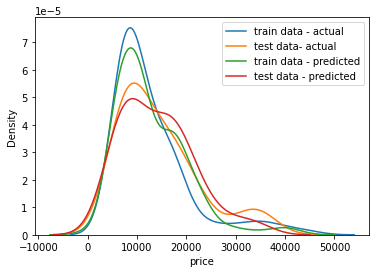

In [743]:
# Lets plot all distributions in the same plot 
sns.distplot(Y_train, hist=False, label = "train data - actual")
sns.distplot(Y_test, hist=False, label ="test data- actual" )
sns.distplot(Y_train_predicted, hist=False, label = "train data - predicted")
sns.distplot(Y_test_predicted, hist=False, label="test data - predicted")
plt.legend()

**multiple linear regression using statsmodel.api**

In [ ]:
# Lets try multiple Linear Regression using statsmodels
X_train_Sm= sm.add_constant(X_train)
sm_mlr =sm.OLS(Y_train,X_train_Sm).fit()
print(sm_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.35e-53
Time:                        14:38:45   Log-Likelihood:                -1527.8
No. Observations:                 160   AIC:                             3070.
Df Residuals:                     153   BIC:                             3091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.295e+04   1931.104  

**multiple linear regression using statsmodels.formula.api**

In [955]:
# making a copy of the train data dataframe
XY_train = X_train.copy()

In [956]:
# adding price column to it
XY_train['price'] = Y_train

In [960]:
XY_train.rename(columns= {'curb-weight': 'curb_weight', 'engine-size':'engine_size', 'city-L/100km':'city_L_100km',
                        'drive-wheels_4wd':'drive_wheels_4wd','drive-wheels_rwd':'drive_wheels_rwd'}, inplace=True)

In [961]:
XY_train

Features,horsepower,curb_weight,engine_size,city_L_100km,drive_wheels_4wd,drive_wheels_rwd,price
84,116.0,2403,110,10.217391,0,0,9279.0
32,76.0,1940,92,7.833333,0,0,6529.0
19,70.0,1909,90,6.184211,0,0,6575.0
62,120.0,2670,140,12.368421,0,1,18280.0
10,101.0,2395,108,10.217391,0,1,16925.0
...,...,...,...,...,...,...,...
78,88.0,2328,122,9.400000,0,0,8499.0
168,116.0,2975,146,9.791667,0,1,17669.0
54,101.0,2385,70,13.823529,0,1,13645.0
88,69.0,1918,97,7.580645,0,0,6649.0


In [963]:
# performing linear regression using statsmodels.formula.api
results = ols('price ~ (horsepower + curb_weight + engine_size + city_L_100km + drive_wheels_4wd + drive_wheels_rwd)', 
                            data=XY_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     111.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.35e-53
Time:                        10:48:02   Log-Likelihood:                -1527.8
No. Observations:                 160   AIC:                             3070.
Df Residuals:                     153   BIC:                             3091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.295e+04   1931.104  

## Polynomial Regression 

Polynomial regression is a particular case of general linear regression

**Polynomial regression with only one independent variable**


<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>

Yhat = a + b1 X +b2 X^2 


<center><b>Cubic - 3rd Order</b></center>

Yhat = a + b1 X +b2 X^2 +b3 X^3


<center><b>Higher-Order</b>:</center>

Y = a + b1 X +b2 X^2 +b3 X^3 ....





<p> Note that first order polynomial is Simple Linear Regression </p>



In [966]:
# lets do 3rd order polynomial regression using engine-size for which we did the simple linear regression 
# in the beginning,

In [990]:
Xtrain 

,engine-size
105,152
159,98
15,209
138,108
109,152
...,...
1,130
120,122
200,141
160,98


In [991]:
Ytrain 

105    13200.0
159     8058.0
15     41315.0
138     7775.0
109    16900.0
        ...   
1      16500.0
120     8921.0
200    22625.0
160     8238.0
10     16925.0
Name: price, Length: 160, dtype: float64

In [985]:
# fit the polynomial using polyfit 
f = np.polyfit(Xtrain.squeeze(),Ytrain,3)
print(f)

[-8.54865424e-03  4.68372267e+00 -5.94665135e+02  2.96385146e+04]


In [986]:
# display the polynomial
poly = np.poly1d(f)
print(poly)

           3         2
-0.008549 x + 4.684 x - 594.7 x + 2.964e+04


In [1002]:
from sklearn.metrics import r2_score 

In [1008]:
# R-squared using the train data
print("The R-squared using the train data is ", r2_score(Ytrain, poly(Xtrain.squeeze())))

The R-squared using the train data is  0.8264891910735416


In [1038]:
# R-squared using the test data
print("The R-squared using the test data is ", r2_score(Ytest, poly(Xtest.squeeze())))


The R-squared using the test data is  0.3494347823725311


In [1042]:
# Lets construct the polynomial inputting a list of x-values
a = np.linspace(50,350, 1000)
b = poly(a)

Text(0, 0.5, 'Price')

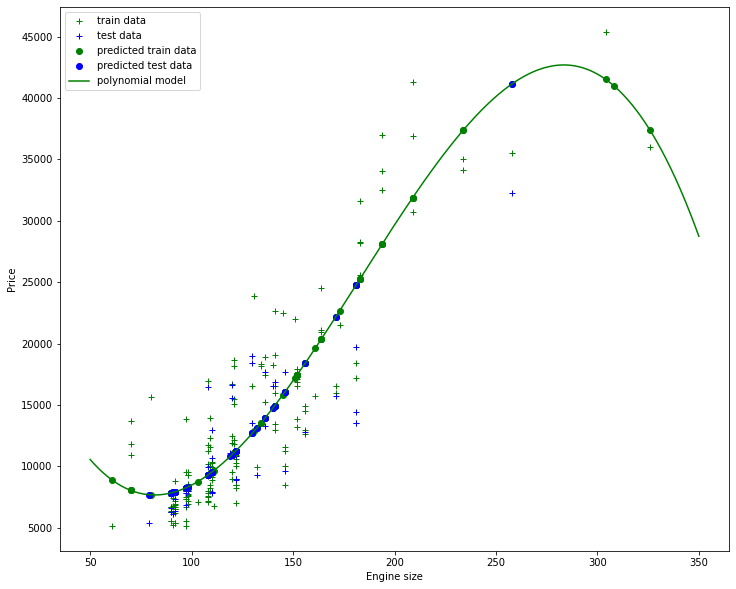

In [1044]:
plt.figure(figsize=(12,10))
plt.plot(Xtrain, Ytrain, 'g+',Xtest, Ytest, 'b+', Xtrain, poly(Xtrain), 'go',Xtest, poly(Xtest), 'bo',a, b, 'g-' )
plt.legend(labels=['train data', 'test data','predicted train data','predicted test data','polynomial model' ])
plt.xlabel("Engine size")
plt.ylabel("Price")

**Polynomial regression using scikit-learn**

In [ ]:
# Lets do the same Polynomial regression using PolynomialFeature from scikit-learn

In [1063]:
from sklearn.preprocessing import PolynomialFeatures 

In [1064]:
polynom = PolynomialFeatures(degree=3, include_bias= False)
# include_bias: when set as True, it will include a constant term in the set of polynomial features. 
# It is True by default.

In [1087]:
Xtrain

,engine-size
105,152
159,98
15,209
138,108
109,152
...,...
1,130
120,122
200,141
160,98


In [1088]:
# Lets use the same train-test split data as above, so that we can compare the coefficients.

Xtrain_p = polynom.fit_transform(Xtrain.values.reshape(-1,1))
Xtest_p = polynom.fit_transform(Xtest.values.reshape(-1,1))
Ytrain_p = Ytrain.values.reshape(-1,1)
Ytest_p = Ytest.values.reshape(-1,1)


In [1089]:
lr = LinearRegression()
lr.fit(Xtrain_p, Ytrain_p)

LinearRegression()

In [1090]:
lr.intercept_

array([29638.51460162])

In [1091]:
lr.coef_

array([[-5.94665135e+02,  4.68372267e+00, -8.54865424e-03]])

In [1092]:
r2_score(Ytrain_p, lr.predict(Xtrain_p))

0.8264891910735416

In [1093]:
r2_score(Ytest_p, lr.predict(Xtest_p))

0.3494347823715902

**Polynomial regression with multiple independent variables**

Lets consider second order regression involving 2 independent variables (X1 and X2) 

$$
Yhat = a + b1 X1 +b2 X2 +b3 X1 X2+b4 X1^2+b5 X2^2
$$


In [988]:
from sklearn.preprocessing import PolynomialFeatures

In [1113]:
pf = PolynomialFeatures(degree=2, include_bias= False)  # if include_bias=True, it will add a column of a constant term as intercept.
pf 

PolynomialFeatures(include_bias=False)

In [1100]:
input 

,horsepower,curb-weight,engine-size,city-L/100km,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,111.0,2548,130,11.190476,0,0,1
1,111.0,2548,130,11.190476,0,0,1
2,154.0,2823,152,12.368421,0,0,1
3,102.0,2337,109,9.791667,0,1,0
4,115.0,2824,136,13.055556,1,0,0
...,...,...,...,...,...,...,...
196,114.0,2952,141,10.217391,0,0,1
197,160.0,3049,141,12.368421,0,0,1
198,134.0,3012,173,13.055556,0,0,1
199,106.0,3217,145,9.038462,0,0,1


In [1101]:
input.drop('drive-wheels_fwd', axis='columns', inplace=True)
input

,horsepower,curb-weight,engine-size,city-L/100km,drive-wheels_4wd,drive-wheels_rwd
0,111.0,2548,130,11.190476,0,1
1,111.0,2548,130,11.190476,0,1
2,154.0,2823,152,12.368421,0,1
3,102.0,2337,109,9.791667,0,0
4,115.0,2824,136,13.055556,1,0
...,...,...,...,...,...,...
196,114.0,2952,141,10.217391,0,1
197,160.0,3049,141,12.368421,0,1
198,134.0,3012,173,13.055556,0,1
199,106.0,3217,145,9.038462,0,1


In [1102]:
# see here 6 featues
input.shape 

(201, 6)

In [1114]:
# constructing the polynomial features
input_pf = pf.fit_transform(input)
input_pf

array([[1.110e+02, 2.548e+03, 1.300e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.110e+02, 2.548e+03, 1.300e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.540e+02, 2.823e+03, 1.520e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.340e+02, 3.012e+03, 1.730e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.060e+02, 3.217e+03, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.140e+02, 3.062e+03, 1.410e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [1115]:
# After polynomial tranform, there are 27 features
input_pf.shape 

(201, 27)

In [1107]:
output 

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [1108]:
output_pf = output.values.reshape(-1,1)
output_pf  

array([[13495.],
       [16500.],
       [16500.],
       [13950.],
       [17450.],
       [15250.],
       [17710.],
       [18920.],
       [23875.],
       [16430.],
       [16925.],
       [20970.],
       [21105.],
       [24565.],
       [30760.],
       [41315.],
       [36880.],
       [ 5151.],
       [ 6295.],
       [ 6575.],
       [ 5572.],
       [ 6377.],
       [ 7957.],
       [ 6229.],
       [ 6692.],
       [ 7609.],
       [ 8558.],
       [ 8921.],
       [12964.],
       [ 6479.],
       [ 6855.],
       [ 5399.],
       [ 6529.],
       [ 7129.],
       [ 7295.],
       [ 7295.],
       [ 7895.],
       [ 9095.],
       [ 8845.],
       [10295.],
       [12945.],
       [10345.],
       [ 6785.],
       [11048.],
       [32250.],
       [35550.],
       [36000.],
       [ 5195.],
       [ 6095.],
       [ 6795.],
       [ 6695.],
       [ 7395.],
       [10945.],
       [11845.],
       [13645.],
       [15645.],
       [ 8845.],
       [ 8495.],
       [10595.

In [1127]:
# splitting the tranformed data into train and test
X__train, X__test, Y__train, Y__test = train_test_split(input_pf, output_pf, test_size=0.20)

In [1128]:
print(X__train.shape)
print(Y__train.shape)
print(X__test.shape)
print(Y__test.shape)

(160, 27)
(160, 1)
(41, 27)
(41, 1)


In [1129]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X__train, Y__train)

LinearRegression()

In [1130]:
poly_reg_model.intercept_

array([18578.89760839])

In [1131]:
# There are 27 coefficients, one for each term (features)
poly_reg_model.coef_

array([[ 1.13127046e+02, -3.18058647e+01,  1.12252361e+02,
         1.66986654e+03,  1.26705400e+04,  1.02392365e+03,
         9.69077850e-01,  6.04860722e-02, -1.43159589e+00,
        -2.67547099e+01,  1.22677963e+02, -3.53807113e+01,
         2.04747577e-02, -1.60176320e-01, -4.87768532e+00,
        -2.21613202e+01, -1.87838909e+01, -2.95989745e-01,
         4.50561272e+01, -3.87523665e+02,  2.30362365e+02,
         4.14766460e+02,  5.86503934e+03,  2.18522536e+03,
         1.26705400e+04,  0.00000000e+00,  1.02392366e+03]])

In [1132]:
print("The R-squared using train data ", r2_score(Y__train, poly_reg_model.predict(X__train)))

The R-squared using train data  0.9025985240115655


In [1133]:
print("The R-squared using test data ", r2_score(Y__test, poly_reg_model.predict(X__test)))

The R-squared using test data  0.8932486074890292
